# Part 1: Modeling Challenge

## Python Coding and Data Set

Import modules.

In [111]:
import pandas as pd
from scipy import stats
import numpy as np
import numpy.random as npr
import pylab as pl
from sklearn import svm, tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

### Load in the data file and header file provided. The dataframe does not currently have a header, load in the header file and attach it to the dataframe.

For this exercise, I am assuming that you have the 'field_names.txt' and 'breast-cancer.csv' files in the same directory as this python notebook. If this is not the case, move them to this directory or change the path names accordingly. The header file is a .txt file; we will read it as an array. 

In [56]:
with open('field_names.txt', 'r') as field_names_file:
    field_data = field_names_file.read()
    field_names = field_data.splitlines()

### Comment on any steps you might take to evaluate or transform the dataset.

Let's make sure to look at the raw data first to get an idea of what we have. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Our data file is in .csv format, which means that if we opened it in a text editor, each column would be separated by commas. We will read in breast cancer data file and attach header file to dataframe using pandas.

We will assume all 0 values are NaN. This is a big assumption, and not one I would normally make. (In our imaginary scenario, we have checked with original data collector(s) to ensure this is the case). How we handle NA/NaN will have a significant impact on our data analysis results, so we should take care to make sure that the original data collectors did indeed mean "0" to mean NA. Many pandas functions will do a great job of ignoring NA/NaN values, but if we need to deliberately ignore them, we can use breast_cancer.dropna() to drop rows with missing values. 

In [57]:
breast_cancer = pd.read_csv('breast-cancer.csv', na_values=['0'], names = field_names)

Let's take a look at our dataframe to get an idea of the data we are working with and to make sure it loaded correctly.

In [58]:
breast_cancer.head(10)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [59]:
breast_cancer.tail(10)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,NaN,NaN,...,11.920,38.30,75.19,439.6,0.09267,0.05494,NaN,NaN,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,NaN,NaN,...,9.456,30.37,59.16,268.6,0.08996,0.06444,NaN,NaN,0.2871,0.07039


In [60]:
breast_cancer.columns.values

array(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst',
       'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst',
       'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean',
       'smoothness_sd_error', 'smoothness_worst', 'compactness_mean',
       'compactness_sd_error', 'compactness_worst', 'concavity_mean',
       'concavity_sd_error', 'concavity_worst', 'concave_points_mean',
       'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean',
       'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'], dtype=object)

In [61]:
breast_cancer.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [62]:
breast_cancer.shape

(569, 32)

### Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [65]:
sorted_diagnosis = breast_cancer.groupby('diagnosis')

In [66]:
sorted_smoothness = sorted_diagnosis['smoothness_mean']

Let's tak e 

In [67]:
sorted_smoothness.mean()

diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64

In [68]:
sorted_smoothness.median()

diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64

In [69]:
m_smoothness = breast_cancer[breast_cancer['diagnosis'] == 'M']['smoothness_mean']
b_smoothness = breast_cancer[breast_cancer['diagnosis'] == 'B']['smoothness_mean']

Let's take a look at the frequency distributions for the data to get an idea of the data we are working with.

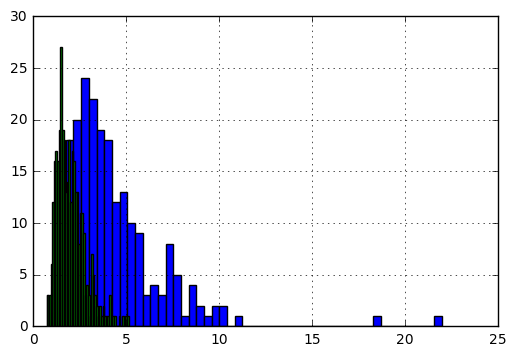

In [72]:
m_smoothness.hist(bins=50)
b_smoothness.hist(bins=50)

Let's draw a quick boxplot to see if we can eyeball any difference in the means. They appear to be quite different, but we will check this with a statistical test.

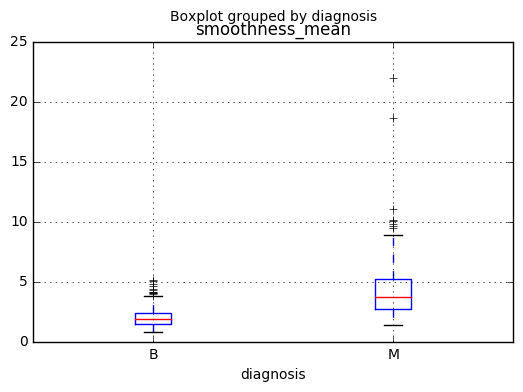

In [73]:
breast_cancer.boxplot(column='smoothness_mean', by = 'diagnosis')

We are comparing the means of two populations. The data are not paired; that is, they weren't able to test the same individual's malignant and benign tumor because of the nature of human data. So we will do an unpaired t-test, being careful to make sure our assumptions are met. Calculate the T-test for the means of two independent samples. This is a two-sided test for the null hypothesis that 2 independent samples have identical average values. This test assumes that the populations have identical variances by default.

Test for equal variances. ttest_ind will underestimate p for unequal variances.

In [74]:
stats.bartlett(m_smoothness, b_smoothness)

BartlettResult(statistic=375.73781008828786, pvalue=1.0541940886194725e-83)

The p-value result for the Bartlett's Test is larger than the threshold of .05, so we cannot reject the null hypothesis that the variances are equal. That is, our assumptions hold. So, we can perform a standard independent 2 sample test that assumes equal population variances. If they were unqual, we could use Welch’s t-test, which does not assume equal population variance.

In [75]:
stats.ttest_ind(m_smoothness, b_smoothness, equal_var = True) 

Ttest_indResult(statistic=15.934158019257902, pvalue=1.6519051758498057e-47)

The p-value is smaller than the threshold of .05, so we reject the null hypothesis of equal averages. Malignant tumors have a statistically significant larger mean than benign tumors t(569) = 15.9, p < .05.

2 sample t-test assumes normally distributed data. We can relax these assumptions and use the Mann-Whitney-Wilcoxon RankSum test.  With this p-value, we are highly confident that the distributions significantly differ, and can claim that the treatments had a significant impact on the measured value.

In [76]:
stats.ranksums(m_smoothness, b_smoothness)

RanksumsResult(statistic=15.024425420050784, pvalue=5.0799913966219325e-51)

The p-value is smaller than the threshold of .05, so we reject the null hypothesis of equal averages. Malignant tumors have a statistically significant larger mean than benign tumors Ranksums(569) = 15.02, p < .05.

In [77]:
sorted_compactness = sorted_diagnosis['compactness_mean']

In [78]:
sorted_compactness.mean()

diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64

In [79]:
sorted_compactness.median()

diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64

In [80]:
m_compactness = breast_cancer[breast_cancer['diagnosis'] == 'M']['compactness_mean']
b_compactness = breast_cancer[breast_cancer['diagnosis'] == 'B']['compactness_mean']

Let's take a look at the frequency distributions of the data that we are working with.

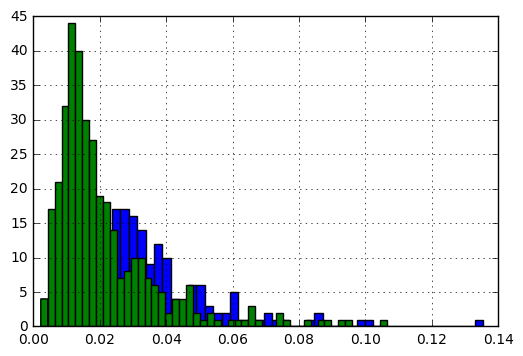

In [81]:
m_compactness.hist(bins=50)
b_compactness.hist(bins=50)

Let's draw a quick boxplot to see if we can eyeball any difference in the means. They appear to be quite different, but we will check this with a statistical test.

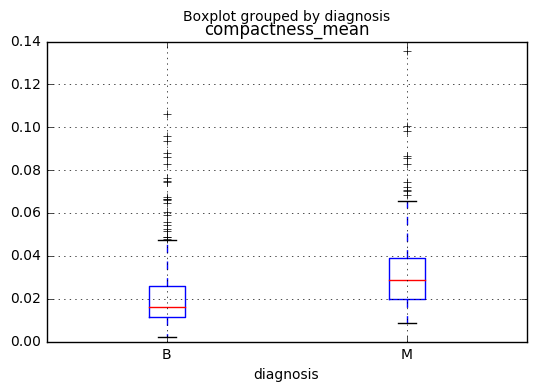

In [82]:
breast_cancer.boxplot(column='compactness_mean', by = 'diagnosis')

We are comparing the means of two populations. The data are not paired; that is, they weren't able to test the same individual's malignant and benign tumor because of the nature of human data. So we will do an unpaired t-test, being careful to make sure our assumptions are met. Calculate the T-test for the means of two independent samples. This is a two-sided test for the null hypothesis that 2 independent samples have identical average values. This test assumes that the populations have identical variances by default.

Test for equal variances. ttest_ind will underestimate p for unequal variances.

In [26]:
stats.bartlett(m_compactness, b_compactness)

BartlettResult(statistic=3.7065117176125604, pvalue=0.054200552693081862)

The p-value is larger than the threshold of .05, so we cannot reject the null hypothesis that the variances are equal. So, we can perform a standard independent 2 sample test that assumes equal population variances. If they were unqual, we could use Welch’s t-test, which does not assume equal population variance.

In [27]:
stats.ttest_ind(m_compactness, b_compactness, equal_var = True) 

Ttest_indResult(statistic=7.2970774374485305, pvalue=9.9759946540745867e-13)

The p-value is smaller than the threshold of .05, so we reject the null hypothesis of equal averages. Malignant tumors have a statistically significant higher compactness mean than benign tumors t(569) = 7.29, p < .05.

2 sample t-test assumes normally distributed data. We can relax these assumptions and use the Mann-Whitney-Wilcoxon RankSum test.  With this p-value, we are highly confident that the distributions significantly differ, and can claim that the treatments had a significant impact on the measured value.

In [83]:
stats.ranksums(m_compactness, b_compactness)

RanksumsResult(statistic=9.0723015362447281, pvalue=1.1652909655953908e-19)

The p-value is smaller than the threshold of .05, so we reject the null hypothesis of equal averages. Malignant tumors have a statistically significant higher compactness mean than benign tumors ranksums(569) = 9.07, p < .05.

### Write a function to generate bootstrap samples of the data.

Oftentimes in research, it’s really difficult to get enough replicate runs for computing reliable confidence intervals with SEM. We are using human disease data here, so that holds especially true for both statistical and ethical reasons. In this case, bootstrapping the confidence intervals is a much more accurate method of determining the 95% confidence interval. 

Let's say we want to plot the 95% confidence interval for the mean of our data samples, using the bootstrap. Essentially, we will draw many, many samples with replacement from the data we have, estimate the mean from each sample, then rank order the means to estimate the 2.5 and 97.5 percentile values for 95% confidence interval. Unlike using normal assumptions to calculate 95% CI, the results generated by the bootstrap are robust even if the underlying data are very far from normal. This is super useful for our flavor of data (human disease data), where we might not be able to get the replicates we want and the data may be far from normal.

We can boostrap confidence interval for any valid statistical function, not just the mean. For example, to find the 95% CI for the standard deviation, we only need to change np.mean to np.std in the arguments. We may also want to explore permutation-resampling, another form of simulation-based statistical calculation often used to evaluate the p-value for the difference between two groups (null hypothesis is that the groups are invariant under permutation). 

In [85]:
def bootstrap(data, num_samples, statistic, alpha):
    # Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic.
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])

Let's try out our bootstrap function on some data we made up that is bimodal and definitely not normal

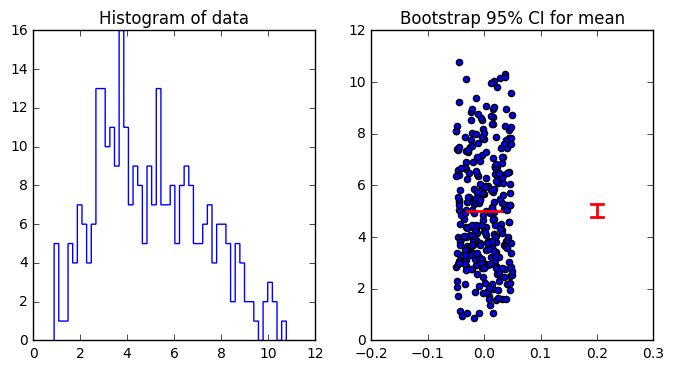

In [86]:
# generate some bimodal, not normal data to test our function
x = np.concatenate([npr.normal(3, 1, 100), npr.normal(6, 2, 200)])
# find mean 95% CI and 100,000 bootstrap samples
low, high = bootstrap(x, 100000, np.mean, 0.05)

# make plots
pl.figure(figsize=(8,4))
pl.subplot(121)
pl.hist(x, 50, histtype='step')
pl.title('Histogram of data')
pl.subplot(122)
pl.plot([-0.03,0.03], [np.mean(x), np.mean(x)], 'r', linewidth=2)
pl.scatter(0.1*(npr.random(len(x))-0.5), x)
pl.plot([0.19,0.21], [low, low], 'r', linewidth=2)
pl.plot([0.19,0.21], [high, high], 'r', linewidth=2)
pl.plot([0.2,0.2], [low, high], 'r', linewidth=2)
pl.xlim([-0.2, 0.3])
pl.title('Bootstrap 95% CI for mean')
pl.savefig('bootstrap.png')

## Exploratory Analysis

Identify 2-3 variables that are predictive of a malignant tumor. Display the relationship visually and write 1-2 sentences explaining the relationship.

Let's take a look at the data. Our response variable (malignant or benign) is a categorical response variable. We have continuous variables as our predictive variables (all of the variables except diagnosis and ID). 

So, we are going to use Logistic Regression, since we learned that this is a statistical technique capable of predicting a binary outcome, like we have here.

In [91]:
# Let's take a look at our data again to get an idea of it using describe.
breast_cancer.describe()

/Users/nicholebennett/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,556.000000,556.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,556.000000,556.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090876,0.050063,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.278553,0.117286,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079468,0.038517,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.206803,0.064087,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,NaN,NaN,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,NaN,NaN,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,NaN,NaN,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,NaN,NaN,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,NaN,NaN,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,NaN,NaN,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [92]:
# We have some NaN values that are interfering with getting summary statistics, so let's remove those rows for the purposes of getting those stats
breast_cancer_dropNA = breast_cancer.dropna()
breast_cancer_dropNA.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,3.104770e+07,14.237565,19.259748,92.736673,663.734712,0.096616,0.105679,0.090876,0.050063,0.181278,...,16.407687,25.679388,108.242878,893.412410,0.132824,0.258472,0.278553,0.117286,0.290802,0.084141
std,1.263967e+08,3.482170,4.246993,24.006362,350.893313,0.013895,0.052643,0.079468,0.038517,0.027446,...,4.797695,6.105744,33.337041,569.492912,0.022616,0.156663,0.206803,0.064087,0.062027,0.018130
min,8.670000e+03,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000692,0.001852,0.116700,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.001845,0.008772,0.156500,0.055040
25%,8.691895e+05,11.760000,16.177500,75.845000,427.750000,0.086665,0.066608,0.030880,0.020895,0.161900,...,13.085000,21.160000,84.567500,521.450000,0.117175,0.151175,0.121800,0.065713,0.250900,0.071873
50%,9.064145e+05,13.455000,18.855000,87.090000,557.650000,0.096035,0.095090,0.064905,0.034840,0.179250,...,15.040000,25.445000,98.320000,696.050000,0.131550,0.217000,0.231400,0.101700,0.282450,0.080075
75%,8.910313e+06,16.040000,21.735000,105.250000,798.050000,0.105400,0.130600,0.132325,0.074842,0.195750,...,19.097500,29.547500,126.750000,1106.750000,0.146325,0.341600,0.386200,0.163150,0.318850,0.092095
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [94]:
breast_cancer.groupby('diagnosis').mean()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,26543824,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.047798,0.026689,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.172520,0.077258,0.270246,0.079442
M,36818050,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


It would seem that malignant tumors have a mor radius, texture, perimeter, and concavity than benign tumors. 

In [95]:
# sort the data by diagnosis (our categorical response variable) and take a look at the summary statistics
sorted_diagnosis = breast_cancer_dropNA.groupby('diagnosis')
sorted_diagnosis.describe()

ID   area_mean  area_sd_error  area_worst  \
diagnosis                                                              
B         count  3.440000e+02  344.000000     344.000000  344.000000   
          mean   2.749156e+07    0.062787       0.281566    1.181844   
          std    1.188265e+08    0.006734       0.112210    0.509727   
          min    8.913000e+03    0.051850       0.111500    0.360200   
          25%    8.750295e+05    0.058447       0.206700    0.791675   
          50%    9.092255e+05    0.061510       0.256550    1.088000   
          75%    8.812915e+06    0.065725       0.338525    1.478250   
          max    9.113205e+08    0.095750       0.881100    2.904000   
M         count  2.120000e+02  212.000000     212.000000  212.000000   
          mean   3.681805e+07    0.062680       0.609083    1.210915   
          std    1.378965e+08    0.007573       0.345039    0.483178   
          min    8.670000e+03    0.049960       0.193800    0.362100   
          25%    8.613450e+05    0.056598       0.390375    0.892825   
          50%    8.953665e+05    0.061575       0.547200    1.102500   
          75%    8.911290e+06    0.067075       0.757300    1.429250   
          max    9.112962e+08    0.097440       2.873000    3.568000   

                 compactness_mean  compactness_sd_error  compactness_worst  \
diagnosis                                                                    
B         count        344.000000            344.000000         344.000000   
          mean           0.021874              0.026979           0.010230   
          std            0.016485              0.033138           0.005477   
          min            0.002252              0.000692           0.001852   
          25%            0.011785              0.011678           0.006651   
          50%            0.016630              0.018650           0.009160   
          75%            0.026687              0.031133           0.012103   
          max            0.106400              0.396000           0.052790   
M         count        212.000000            212.000000         212.000000   
          mean           0.032281              0.041824           0.015060   
          std            0.018387              0.021603           0.005517   
          min            0.008422              0.011010           0.005174   
          25%            0.019662              0.026998           0.011415   
          50%            0.028590              0.037125           0.014205   
          75%            0.038910              0.050443           0.017497   
          max            0.135400              0.143800           0.040900   

                 concave_points_mean  concave_points_sd_error  \
diagnosis                                                       
B         count           344.000000               344.000000   
          mean             23.436860                87.827122   
          std               5.378146                12.967815   
          min              12.020000                54.490000   
          25%              19.587500                79.542500   
          50%              22.830000                87.360000   
          75%              26.450000                96.832500   
          max              41.780000               127.100000   
M         count           212.000000               212.000000   
          mean             29.318208               141.370330   
          std               5.434804                29.457055   
          min              16.670000                85.100000   
          25%              25.782500               119.325000   
          50%              28.945000               138.000000   
          75%              32.690000               159.800000   
          max              49.540000               251.200000   

                 concave_points_worst      ...        radius_worst  \
diagnosis                                  ...                       
B         coun

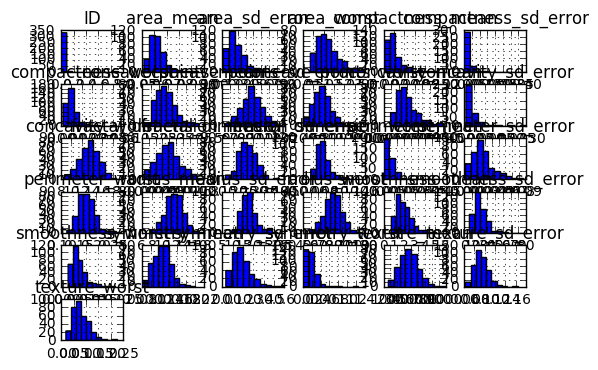

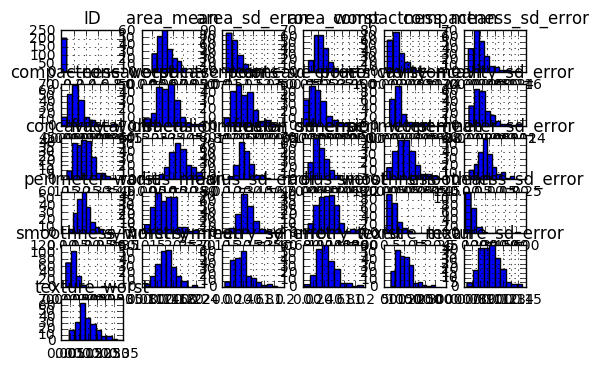

In [96]:
# take a look at the histograms to get a nice visual representation of our problem
sorted_diagnosis.hist()
pl.show()

In [99]:
# We need to create a dummy variable to represent our categorical response variable as a binary
# This will create a new DataFrame with binary indicator variables for each category of diagnosis in the column specified. 
dummy_diagnosis = pd.get_dummies(breast_cancer['diagnosis'], prefix='diagnosis')
dummy_diagnosis = dummy_diagnosis.drop('diagnosis_B', axis = 1)
dummy_diagnosis.head()
# manually add the intercept. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.
dummy_diagnosis ['intercept'] = 1.0

In [100]:
# merge the new dummy columns into the original dataset and get rid of the diagnosis column which we no longer need
breast_cancer_dropdiag = breast_cancer.drop('diagnosis', axis=1)
breast_cancer_logreg = pd.concat([dummy_diagnosis, breast_cancer_dropdiag], axis=1)
breast_cancer_logreg.head()

,diagnosis_M,intercept,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1.0,1.0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,1.0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,1.0,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,1.0,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,1.0,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
# now we are ready to actually do our logistic regression. 
# we'll be predicting the diagnosis_M column (whether malignant or not) using the other columns (except ID)
# instantiate a logistic regression model, and fit it
# We also need to flatten diagnosis into a 1-D array, so that scikit-learn will properly understand it as the response variable
breast_cancer_logreg = breast_cancer_logreg.dropna()
y_diagnosis = np.ravel(breast_cancer_logreg['diagnosis_M'])
# we are going to simplify our predictive variables
# for the first analysis, we'll just look at the mean to see if average values can predict malignancy (expound upon how important it is to have independent measures)
# there is value in looking at the extreme values as well, but we will start with mean values so we have independent measures
# there is also value in looking at whether variation in these measurements predicts malignancy, but for our purposes, we will focus on mean and worst
x_breast_cancer_pred = breast_cancer_logreg.drop(['diagnosis_M', 'ID', 'radius_sd_error', 'texture_sd_error', 'perimeter_sd_error', 'area_sd_error', 'smoothness_sd_error', 'compactness_sd_error', 'concavity_sd_error', 'symmetry_sd_error', 'fractal_dimension_sd_error'], axis = 1)

model = LogisticRegression()
model = model.fit(x_breast_cancer_pred, y_diagnosis)

# check the accuracy on the training set
model.score(x_breast_cancer_pred, y_diagnosis)

0.9532374100719424

95.3% accuracy seems pretty good. Let's take a look at the coefficients.

In [104]:
# examine the coefficients
pd.DataFrame(zip(x_breast_cancer_pred.columns, np.transpose(model.coef_)))

,0,1
0,intercept,[-0.417799547096]
1,radius_mean,[-2.36000022]
2,radius_worst,[0.217117596118]
3,texture_mean,[-0.00741558171413]
4,texture_worst,[0.492804151759]
5,perimeter_mean,[0.763224052974]
6,perimeter_worst,[0.270968228668]
7,area_mean,[0.0363528627828]
8,area_worst,[-0.947504455581]
9,smoothness_mean,[0.915752454584]


Increase in mean radius leads to increase in likelihood of tumor being malignant.

Increase in the worst concavity leads to increase in likelihood of tumor being malignant.

Let's visualize this.

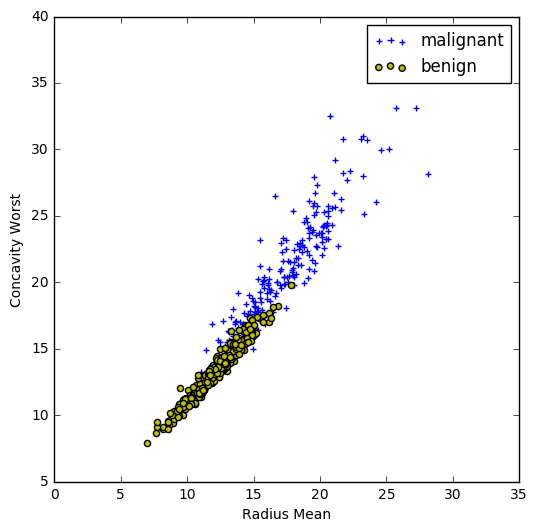

In [105]:
def render_malignant(breast_cancer, malignant, benign):
    plt.figure(figsize=(6, 6))

    plt.scatter(np.extract(malignant, breast_cancer['radius_mean']), 
                np.extract(malignant, breast_cancer['concavity_worst']), 
                c='b', marker='+', label='malignant')
    plt.scatter(np.extract(benign, breast_cancer['radius_mean']), 
                np.extract(benign, breast_cancer['concavity_worst']), 
                c='y', marker='o', label='benign')
    plt.xlabel('Radius Mean');
    plt.ylabel('Concavity Worst');
    plt.axes().set_aspect('equal', 'datalim')

malignant = breast_cancer['diagnosis'] == 'M'
benign = breast_cancer['diagnosis'] == 'B'
render_malignant(breast_cancer, malignant, benign)
plt.legend();

## Modeling

### Build a model to predict the malignant tumors.  

### Use at least two classification techniques; compare and contrast the advantages and disadvantages of each. Identify how you would control for overfitting in each classification technique.

Okay, let's look at our data again. We have an ID column, which are our independent samples (none are repeated). We want to predict malignancy (our "target" or "label"), which is a categorical response variable with all of our other columns, which are continuous variables. We have treated cells with a "0" as an "NA." Normally, this would be a dangerous thing to just assume, so we are going to pretend that we talked with our data collectors and discovered that they were using 0's as placeholders. This seems what likely happened since a measure like perimeter mean is not likely to have a value of "0." In a real data analysis, we would make extra sure that this was the intention of the data collectors, but we will assume 0 values as NA. Then we will ignore rows with missing values. We lose data this way, but we are also sure of its accuracy and precision.  

There are a myriad of other ways to deal with missing values. We can create dummy flags for missing values. We can impute the missing value with mean or median (for more skewed distributions, choose median). You can also impute values using mean/median and other salient features of the data, like gender. With categorical variables, you can create a new level to code missing values. These methods are better at retaining data than the one we chose, but we are just going to ignore samples with missing values for simplicity.

For a machine learning problem, we are trying to predict a property of the data using n samples of data. In this case, we are trying to predict malignancy. Our data here is multivariate because our entries have multiple columns (multi-dimensional). 

Machine learning problems can then be divided into supervised and unsupervised. With unsupervised learning, our data would consist of input without any target to predict any target value. The goal in these types of problems may be to discover groups of similar examples within the data (clustering) or to determine the distribution of data within the input space (density estimation) or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization. Some examples of unsupervised learning are Apriori algorithm and K-means.

Since we are trying to predict something (malignancy of tumor--our target value), we will use supervised learning. Supervised learning comes in two flavors of task: regression and classification. Regression handles a continous target variable. We are trying to predict something finite and categorical (malignant or benign), so we will be using classification supervised learning. Some flavors of supervised learning are Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc. 

Another flavor of machine learning is reinforcement learning, where the model is trained to make specific decision. It trains itself continuously using trial and error, learning from past experience and trying to capture the best possible knowledge to make accurate decisions. An example of reinforcement learning is the Markov Decision Process.

We will be using Logistic Regression, Support Vector Machine, and Naive Bayes to predict malignancy of the tumor based on the mean measurements of the tumor. 

In [106]:
# Create our test, training, and validation data
X = x_breast_cancer_pred
y = y_diagnosis
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

Logistic Regression is used to estimate binary values (like 0/1 or malignant/benign) based on a set of independent variables. It predicts the probability of an event (in our case malignancy) by fitting the data to a logit function. 

Logistic regression is pretty robust: the independent and dependent variables don’t have to be normally distributed, or have equal variance or homogeneity in each group. It does not assume a linear relationships between the independent and dependent variables, it can handle nonlinear effects, and you can add interaction terms and power effects. There are lots of ways to regularize your model to correct for overfitting. Unlike Naive Bayes, you don't have to worry about your features being correlated. Logistic regression is much easier to interpret than Support Machine Vectors or Decision Trees; you get a nice probabilistic answer. You can also easily update the model to take in new data, which is difficult with SVM or decision trees. So, this is a method that is useful if you are looking for a probabilistic framework (like if you want confidence intervals) or if you expect to get more training data in the future that you would like to incorporate into your model. However, logistic regression requires much more data to achieve meaningful, stable results than a discriminant analysis.

To reduce overfitting for a logistic regression model, we can keep it simple (use fewer parameters to tune). If we can remove a parameter without significantly increasing the out of sample prediction error, that is great. We can also use cross-validation, using some of the data points to build the model and then evaluate the error on the data points left out of the model. Repeat this, and you will get a better representative of the error you would expect with future values rather than just the data you have. Alternatively, we can use regularization to penalize certain sources of overfitting. 

As with any of these methods, better data is a better use of your time than picking the best algorithms (garbage in, garbage out). With huge datasets, you may want to choose an algorithm for its speed or ease of use rather than classification performance (look at Bayes instead of SVM!).

In [119]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(x_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97        51
        1.0       0.94      0.97      0.95        32

avg / total       0.96      0.96      0.96        83

[[49  2]
 [ 1 31]]


With the Support Vector Machine algorithm, each data point is plotted as a point in n-dimensional space (n is the number of independent predictor variables we have). We find the line that splits the data into two differently-classified groups in each pair combination of the n-dimensions. 

Support Vector Machine is effective in high-dimensional spaces, like we have here. There is high accuracy and nice theoretical guarantees regarding overfitting if you use the correct kernal. However, if the number of features is much greater than the number of samples, the method will likely give poor performance. Support Vector Machines also do not directly give probability estimates. You can get these using cross-validation. This is also a memory-intensive method. It is a bit harder to interpret than other methods. It is also a bit more difficult to run and tune. 

To reduce chances of overfitting with Support Vector, you want to avoid having a large number of features and few samples. As with any method, getting more data will reduce overfitting. You can also try some feature reduction techniques, like PCA to remove redundant features as a pre-processing step to Support Vector Machine. You can also try out various kernals coupled with cross validation to measure how well the model is generalizing to future data. As with any model, simpler is better.

In [115]:
# fit a SVM model to the data
model = svm.SVC()
model.fit(x_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

        0.0       0.61      1.00      0.76        51
        1.0       0.00      0.00      0.00        32

avg / total       0.38      0.61      0.47        83

[[51  0]
 [32  0]]


/Users/nicholebennett/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes is a classification technique based on Bayes Theorem. This method is particularly useful for very large data sets. It is nice an simple and usually outperforms even highly sophisticated classification models. Essentially, we will be calculating the posterior probability P(m|x) (the probability of malignancy given a certain attribute of the tumor) from the prior probabilities of the predictor P(x), the prior probability of the target (malignancy) P(m), and the likelihood of the predictor tumor measurment given it is malignant P(x|m). P(m|x) = P(x|m)P(m)/P(x). This is often used for problems with more than two outcomes (we only have two here).

Naive Bayes is useful because it is super simple. If the conditional independence assumption holds, this classifier will converge much quicker than disciminative models, so you will need less training data. This is a good method if you want something fast and easy that performs pretty well. The biggest disadvantage is that you can't learn anything about the interactions between features. 

Naive Bayes is relatively immune to overfitting. Your choice of priors will determine the amount of overfitting you need to worry about. Priors are your idea (evidence-based or not) of the state of the world before you fit your model, so you can really introduce bias this way. There's lots of argument about the best way to handle this. However, the hypothesis function for Naive Bayes is simpler compared to other algorithms, like logistic regression. It does not model interactions, so it ignores some of the data in the model; this can make it an inherently high bias model (has high approximation error but is unlikely to overfit). Essentially, this method can be biased by the priors you use (it can get really off target), but it doesn't get tricked into following all of the noise of the data like many other methods do. 

In [113]:
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(x_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96        51
        1.0       0.94      0.94      0.94        32

avg / total       0.95      0.95      0.95        83

[[49  2]
 [ 2 30]]


# Part 2: Feedback

# student-sample-1.py

In [109]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

ImportError: cannot import name LinearRegression

### Code: Feel free to comment on style, library usage, or other improvements. 

General notes: I would have the student do these fixes themselves (my hands will never touch their keyboard). Also, I will not give them the answer. I will lead with questions or scenarios that will help lead them to the answer. If they are at a loss, I may help them with useful terms to Google. That way they can learn a troubleshooting process that they can take into their own work.

For instance, I would have the student look at the first error, which is "ImportError: cannot import name LinearRegression." Using questions (not giving away the answer), I would have them figure out that Line 5: from "sklearn import LogisticRegression" should be "from sklearn.linear_model import LogisticRegression." Some Google-ing may be necessary, but I would want them to learn that this error was caused by improperly loading the module. Since we are talking about modules, I would have them look at their loading in modules and tell them best practice is to load them all in at first. So, I would have them move all of them to the top of the file, and they will likely notice that they have "from sklearn.cross_validation import cross_val_score" twice in there.

I would lead the student to follow their variable names. One way to get students to see this is to get them to write down each variable name and what it contains. This will lead the student to see that they had named their dataframe "d" and then referred to it in Line 13 as "data." They can fix this either by switching Lines 13 and 14 to "d" instead of "data" or switching line 9 from "d" to "data." I would use this an an opportunity to get them to think about renaming their variables to more specific names. So, we'd also take a look at x1 and x2 and rename them to more appropriate and specific variables (more in the methodology section about which is the features and which is the response). If they are confused about this, I will have them take a look at the raw data and explain to me what a good, specific name for this dataframe might be. This data seems to be about jobs and their salaries, so let's give it a more approriate name. I would also get them to look through the entire file (good learning opportunity to use find and replace!) to replace all instances of this with their new variable name.

### Methodology: Feel free to comment on the student's data setup, modeling methodology, and model evaluation.

Before we even touch our code and read in our data, I want to take a look at our data more closely. I would have the student open up the file in excel or its open source equivalent and just look at the raw data. I will ask the student what each column holds. What type of data is it (categorical or continuous or something else?)? How are missing data points handled? Are they just blank cells or are they entered with NA? Is there any problematic-looking data formats? I would get the student to point out how the data could have been better coded (dealing with spaces and special symbols) and tell me how they want to handle the NaN values. (The blank spaces will be replaced with NaN). 

After this, I will get them to explore their data by making scatterplots and looking at the head and tail to make sure their data is what they expected. We still aren't to that first error, so I will just assume they do this in the interpreter so we can move along.

We talk about whether or not to drop the rows with NA values. We will talk about the pros and cons of doing this and other ways to impute data. Whatever decision the student makes, I want them to have a sound statistical reason for doing so. 

Before analyzing their data, I want them to show me some exploratory analysis (histograms, scatterplots) and describe to me what the data looks like. 

Before we even get to the model that the student chose, I would get them to tell me the question they are trying to ask. It looks like they are trying to ask how salary depends on the contract type. If that is the case, then I would get them to characterize these two data types (salary is continuous, contract type is categorical). So we have salary, a continous variable, as our response/dedependent variable, and we have contract type, a categorical variable with two levels, as our predictor/independent variable. Did we choose the correct statistical test? Linear regression, which is what the student chose is used for a continuous dependent variable with a normal distribution and a continuous independent variable with a normal distribution. Another glaring thing is that the student has "x1" and "x2" instead of "x" and "y" for independent and dependent variables, respectively. This would be a good opportunity to clear up any confusion the studen may have with these. This is also a good opportunity to discuss potential problems one may run into doing predictive modeling with categorical variables. 

Let's assume the student meant to try to predict the type of job contract using the job salary. Then, I would lead the student to investigate Logistic Regression as a more appropriate model. They have already started dummy-coded their variables, but they are backwards and need to be just one binary response value. Let's fix that. I would get the student to recognize this by having them examine the X and y objects and think critically about them.

We will pay special attention to getting the data in a format that the model wants--I would have the student walk me through any data transformations that need to happen (like having the y be a 1-D array instead of two columns of dummy variables as it is here).

Then, when we are cross validating the model, I would have the student take me through their steps. Why did they choose cv=1, and what might be a better choice?

### Conceptual Understanding: Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

This student seems to be struggling the most with what a dependent and independent variable is, so I might set up some different questions using their data to make sure they understand how to approach future analysis. With each data type, they will then identify some analyses that could be used to answer the statistical question. 

At this point, I would have the student think about some other ways this data could be analyzed (other machine-learning classification methods). What are some of the pros and cons of these?

We would also talk about the best way to visualize this data to communicate it. For instance, we could plot the probability of full time job increases with increase in salary. 

We would also talk about some common statistical mistakes to make (and to be careful of), like coming up with a hypothesis after the fact or p-hacking. 

# student-sample-2.py

In [110]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

IOError: File ../data/train.csv does not exist

### Code: Feel free to comment on style, library usage, or other improvements.

The code initially appears syntatically correct, but let's take a closer look. 

I would talk to this student about picking more specific names for variables. The names for the dataframe and model variables are all pretty generic, and I would help them narrow down better ones so they can remember what analysis they were running when they wrote this. 

### Methodology: Feel free to comment on the student's data setup, modeling methodology, and model evaluation.

Again, it looks like we have confused the model we should be using. We will check with the student's intended question, and make sure it is okay to switch the variables and proceed with a Logistic Regression. We also remember that y needs to be a 1-D array. 

### Conceptual Understanding: Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

Again, I would ask the student about different analyses for different data types, using their data or other real-world data as an exmaple. Since this student seems to have a good understanding of the basics, I would talk to them more about how they cross-validated their model and why they chose the parameters they did. What might happen if they used different ones? Also, what are some strengths and weaknesses of the analysis they chose?